# 소비 패턴 분석

## 파일 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
 pd.options.display.float_format = '{:.5f}'.format 

In [4]:
df1 = pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv')
df1.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [106]:
df2 = pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv')
df2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.00000,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.00000,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.00000,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.00000,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.00000,1


In [6]:
df3 = pd.read_csv('LPOINT_BIG_COMP_03_COP_U.csv')
df3.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [7]:
df4 = pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv')
df4.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [8]:
df6 = pd.read_csv('LPOINT_BIG_COMP_06_LPAY.csv')
df6.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


In [9]:
# demo 정보와 lpay 정보 결합
df = df6.merge(df1, how = 'left', on = 'cust')
df

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ma_fem_dv,ages,zon_hlv
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11
...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800,여성,50대,Z16
353180,M470112503,210104210652271,A06,2,20210104,21,6440,여성,50대,Z16
353181,M748878049,210119200278240,A02,1,20210119,20,17600,여성,30대,Z10
353182,M748878049,210119180267206,A02,1,20210119,18,12400,여성,30대,Z10


## 데이터 전처리

### 컬럼 타입 변경 및 추가 컬럼 생성

In [10]:
# age 컬럼 숫자 타입으로 변경
df['ages'] = df['ages'].str.replace(pat=r'[ㄱ-ㅣ가-힣]+', repl= r'', regex=True)
df['ages'] = df['ages'].astype(int)

In [11]:
df['de_dt'] = df['de_dt'].astype(str) 

In [12]:
# 요일 컬럼 만들기
from datetime import datetime, timedelta
df['de_dt'] = pd.DatetimeIndex(df['de_dt'])
df['weekday'] = df['de_dt'].apply(lambda x: x.weekday())

In [13]:
# 구매 횟수 컬럼 만들기
count = df.groupby('cust')['rct_no'].count()
pd.DataFrame(count)

,rct_no
cust,
M000136117,4
M000419293,42
M000494848,94
M000557840,38
M000871427,5
...,...
M999227380,2
M999268192,30
M999599111,77


In [14]:
# 클러스터링에 사용되는 나이, 구매금액, 구매시간 mean값으로 pivot table 생성
pivot_df = pd.pivot_table(df, index = 'cust', values = ['ages', 'buy_am', 'weekday', 'de_hr'])

In [66]:
# pivot table과 count 테이블 결합
X = pivot_df.merge(count, how = 'left', on = 'cust')
X

,ages,buy_am,de_hr,weekday,rct_no
cust,,,,,
M000136117,30,284375.25000,11.75000,4.00000,4
M000419293,40,84016.69048,15.52381,3.45238,42
M000494848,30,48932.07447,12.89362,3.01064,94
M000557840,30,41930.00000,16.52632,3.89474,38
M000871427,20,9740.00000,14.20000,2.40000,5
...,...,...,...,...,...
M999227380,40,234100.00000,15.50000,3.00000,2
M999268192,30,34172.00000,12.50000,2.20000,30
M999599111,40,53657.62338,14.48052,3.49351,77


### 극단치 제거

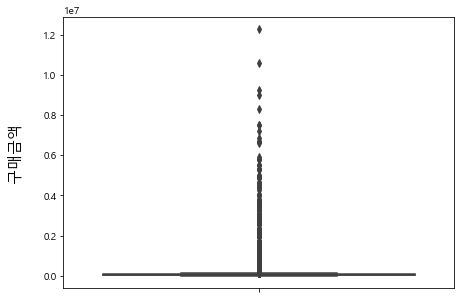

In [58]:
# 구매 금액 극단치 확인
plt.figure(figsize=(7,5))
sns.boxplot(y= X.buy_am);
plt.ylabel('구매금액', fontsize=15, labelpad=20);

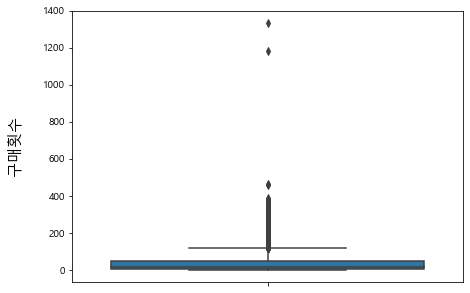

In [59]:
# 구매 횟수 극단치 확인
plt.figure(figsize=(7,5))
sns.boxplot(y= X.rct_no);
plt.ylabel('구매횟수', fontsize=15, labelpad=20);

In [60]:
# 평균 구매 금액이 100원인 컬럼 개수 확인
X[X.buy_am <= 100]

,ages,buy_am,de_hr,weekday,rct_no
cust,,,,,
M012350286,30,100.00000,14.00000,4.00000,1
M025168868,40,100.00000,13.00000,1.00000,2
M038608044,20,100.00000,14.00000,0.00000,1
M045767804,40,100.00000,17.00000,0.00000,1
M068944376,30,100.00000,17.00000,0.75000,8
...,...,...,...,...,...
M935375271,50,100.00000,9.50000,3.00000,2
M943412065,30,100.00000,11.33333,1.33333,3
M945377883,40,100.00000,17.66667,1.00000,3


In [85]:
# 평균 구매금액 분산이 넓어 정확한 이상치 확인 및 제거 어려움 
## 최극단치 제외한 평균 구매 금액 100원 초과 6백만원 미만인 행들만 분석에 사용
X = X[(X.buy_am > 100) & (X.buy_am < 6000000)]

In [86]:
# 최극단치 제외한 총 구매 횟수 400이하의 컬럼 사용
X = X[(X.rct_no < 400)]

In [87]:
X

,ages,buy_am,de_hr,weekday,rct_no,clustering
cust,,,,,,
M000136117,30,284375.25000,11.75000,4.00000,4,0
M000419293,40,84016.69048,15.52381,3.45238,42,1
M000494848,30,48932.07447,12.89362,3.01064,94,0
M000557840,30,41930.00000,16.52632,3.89474,38,0
M000871427,20,9740.00000,14.20000,2.40000,5,0
...,...,...,...,...,...,...
M999227380,40,234100.00000,15.50000,3.00000,2,1
M999268192,30,34172.00000,12.50000,2.20000,30,3
M999599111,40,53657.62338,14.48052,3.49351,77,1


### Scaling 

In [88]:
# MinMaxScaler 사용
mscaler = MinMaxScaler()
mscaler.fit(X)
Mscaled_X = mscaler.fit_transform(X)

Mscaled_X = pd.DataFrame(Mscaled_X, columns = X.columns)
Mscaled_X

,ages,buy_am,de_hr,weekday,rct_no,clustering
0,0.20000,0.04792,0.51087,0.66667,0.00777,0.00000
1,0.40000,0.01413,0.67495,0.57540,0.10622,0.33333
2,0.20000,0.00822,0.56059,0.50177,0.24093,0.00000
3,0.20000,0.00704,0.71854,0.64912,0.09585,0.00000
4,0.00000,0.00161,0.61739,0.40000,0.01036,0.00000
...,...,...,...,...,...,...
8819,0.40000,0.03944,0.67391,0.50000,0.00259,0.33333
8820,0.20000,0.00573,0.54348,0.36667,0.07513,1.00000
8821,0.40000,0.00901,0.62959,0.58225,0.19689,0.33333
8822,0.20000,0.00138,0.47826,0.49789,0.20207,0.00000


## K_means Clustering

### clustering

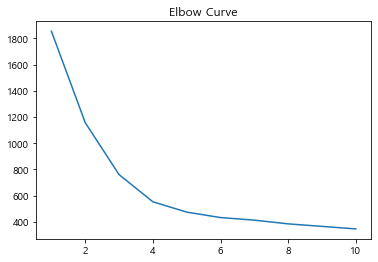

In [89]:
# Elbow Curve 분석
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(Mscaled_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

In [90]:
# Silhouette 분석
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(Mscaled_X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Mscaled_X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4222466776234127
For n_clusters=3, the silhouette score is 0.4234613622460662
For n_clusters=4, the silhouette score is 0.46117976417858736
For n_clusters=5, the silhouette score is 0.45288162589347575
For n_clusters=6, the silhouette score is 0.3916966196432723
For n_clusters=7, the silhouette score is 0.37266507000246424
For n_clusters=8, the silhouette score is 0.33543358573669013


In [91]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(Mscaled_X)

KMeans(n_clusters=4, random_state=0)

In [92]:
X['clustering'] = kmeans.labels_
X.head()

,ages,buy_am,de_hr,weekday,rct_no,clustering
cust,,,,,,
M000136117,30,284375.25000,11.75000,4.00000,4,0
M000419293,40,84016.69048,15.52381,3.45238,42,1
M000494848,30,48932.07447,12.89362,3.01064,94,0
M000557840,30,41930.00000,16.52632,3.89474,38,0
M000871427,20,9740.00000,14.20000,2.40000,5,0


### 시각화

<AxesSubplot:xlabel='clustering', ylabel='ages'>

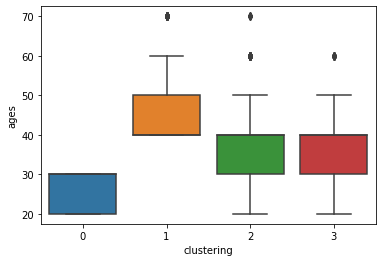

In [251]:
sns.boxplot(x='clustering', y='ages', data=X)

<AxesSubplot:xlabel='clustering', ylabel='de_hr'>

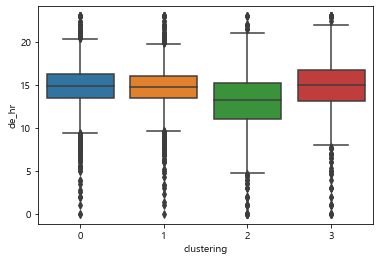

In [94]:
sns.boxplot(x='clustering', y='de_hr', data=X)

<AxesSubplot:xlabel='clustering', ylabel='weekday'>

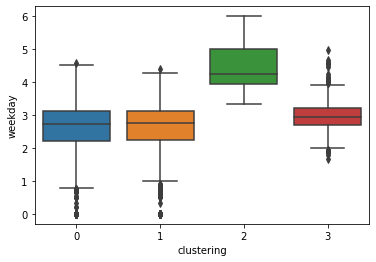

In [253]:
sns.boxplot(x='clustering', y='weekday', data=X)

<AxesSubplot:xlabel='clustering', ylabel='buy_am'>

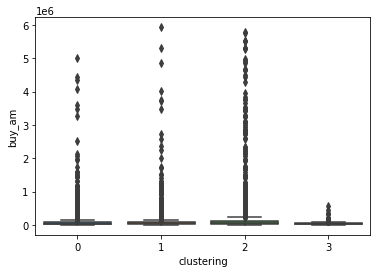

In [254]:
sns.boxplot(x='clustering', y='buy_am', data=X)

<AxesSubplot:xlabel='clustering', ylabel='rct_no'>

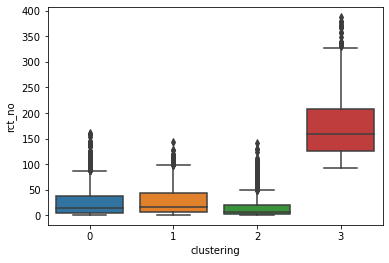

In [255]:
sns.boxplot(x='clustering', y='rct_no', data=X)

## 클러스터링 그룹별 상품구매군분석
- 연령대가 차이가 났던 클러스터링 0집단과 1집단의 상품군에 차이가 있는지 알아보고자 함

In [290]:
# 구메 데이터와 상품군 데이터 결합
df24 = df2.merge(df4, how = 'left', on = 'pd_c')
df24

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.00000,1,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.00000,1,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.00000,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.00000,1,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.00000,1,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.00000,1,백화점/마트모바일상품권,상품권,모바일상품권
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.00000,1,백화점/마트모바일상품권,상품권,모바일상품권
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.00000,1,백화점/마트모바일상품권,상품권,모바일상품권
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.00000,1,백화점/마트모바일상품권,상품권,모바일상품권


In [279]:
clustering1 = X[X.clustering == 0]
clustering1

,ages,buy_am,de_hr,weekday,rct_no,clustering
cust,,,,,,
M000494848,30,48932.07447,12.89362,3.01064,94,0
M000871427,20,9740.00000,14.20000,2.40000,5,0
M001248380,30,8090.08772,10.45614,2.73684,57,0
M001403108,20,11942.82051,15.30769,3.25641,39,0
M001932188,30,16490.00000,11.57143,2.28571,14,0
...,...,...,...,...,...,...
M998574012,20,13074.82955,15.84091,3.12500,88,0
M998600186,20,10000.00000,12.00000,3.00000,1,0
M998844493,30,6523.66667,16.33333,2.51852,27,0


In [330]:
clustering2 = X[X.clustering == 1]
clustering2

,ages,buy_am,de_hr,weekday,rct_no,clustering
cust,,,,,,
M000419293,40,84016.69048,15.52381,3.45238,42,1
M001521411,40,33109.37500,13.56250,2.87500,32,1
M003427143,40,25200.00000,18.50000,0.00000,2,1
M003528940,50,237944.75000,15.57500,2.85000,40,1
M003673750,50,29717.70330,16.79121,3.46154,91,1
...,...,...,...,...,...,...
M998579559,40,63988.87097,13.35484,3.00000,62,1
M999002436,50,106352.42424,13.66667,2.81818,33,1
M999227380,40,234100.00000,15.50000,3.00000,2,1


In [316]:
clustering1_products = clustering1.merge(products, how = 'left', on = 'cust')
clustering1_products

,ages,buy_am,de_hr,weekday,rct_no,clustering,clac_hlv_nm,구매개수
cust,,,,,,,,
M000494848,30,48932.07447,12.89362,3.01064,94,0,과자,44.00000
M000494848,30,48932.07447,12.89362,3.01064,94,0,음료,39.00000
M000494848,30,48932.07447,12.89362,3.01064,94,0,남성의류,38.00000
M000494848,30,48932.07447,12.89362,3.01064,94,0,테넌트/음식점,33.00000
M000494848,30,48932.07447,12.89362,3.01064,94,0,채소,24.00000
...,...,...,...,...,...,...,...,...
M999770689,30,8413.67089,11.00000,2.98734,79,0,패션잡화,2.00000
M999770689,30,8413.67089,11.00000,2.98734,79,0,건강용품,1.00000
M999770689,30,8413.67089,11.00000,2.98734,79,0,병통조림,1.00000


In [331]:
clustering2_products = clustering2.merge(products, how = 'left', on = 'cust')
clustering2_products

,ages,buy_am,de_hr,weekday,rct_no,clustering,clac_hlv_nm,구매개수
cust,,,,,,,,
M000419293,40,84016.69048,15.52381,3.45238,42,1,남성의류,17.00000
M000419293,40,84016.69048,15.52381,3.45238,42,1,여성의류,13.00000
M000419293,40,84016.69048,15.52381,3.45238,42,1,과자,7.00000
M000419293,40,84016.69048,15.52381,3.45238,42,1,테넌트/음식점,7.00000
M000419293,40,84016.69048,15.52381,3.45238,42,1,스포츠패션,5.00000
...,...,...,...,...,...,...,...,...
M999962961,50,214602.25000,16.18750,3.43750,16,1,생활/주방가전,1.00000
M999962961,50,214602.25000,16.18750,3.43750,16,1,시즌스포츠,1.00000
M999962961,50,214602.25000,16.18750,3.43750,16,1,양곡,1.00000


In [311]:
# 상품군 구매 횟수 컬럼 생성
products = pd.DataFrame(df24.groupby('cust')['clac_hlv_nm'].value_counts())
products.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 496493 entries, ('M000034966', '과자') to ('M999962961', '주방잡화')
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   clac_hlv_nm  496493 non-null  int64
dtypes: int64(1)
memory usage: 5.4+ MB


In [312]:
# df24와 결합 하기 위한 테이블 처리
products.rename(columns = {'clac_hlv_nm': '구매개수'}, inplace = True )
products.reset_index(inplace = True)
products = products.set_index('cust')

In [325]:
clustering1_products = pd.DataFrame(clustering1_products.groupby('clac_hlv_nm')['구매개수'].sum())
clustering1_products.sort_values('구매개수', ascending = False)

,구매개수
clac_hlv_nm,
과자,52215.00000
채소,36146.00000
음료,33841.00000
대용식,32061.00000
유제품,30292.00000
냉장식품,27871.00000
테넌트/음식점,23735.00000
과일,21662.00000
주류,19566.00000


In [333]:
clustering2_products = pd.DataFrame(clustering2_products.groupby('clac_hlv_nm')['구매개수'].sum())
clustering2_products.sort_values('구매개수', ascending = False)

,구매개수
clac_hlv_nm,
과자,83171.00000
채소,79094.00000
대용식,62380.00000
유제품,53231.00000
냉장식품,51331.00000
음료,46019.00000
과일,45327.00000
축산물,37188.00000
테넌트/음식점,30127.00000


In [119]:
# 클러스터링 0집단과 1집단의 상품 구매군에 따른 차이는 없었음